## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [250]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [251]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Code the helper function 'show_data()' that visualizes each given observation.

In [252]:
Y_train = np.eye(10)[Y_train]
Y_test = np.eye(10)[Y_test]
X_train = X_train.reshape(-1,28,28)
X_test = X_train.reshape(-1,28,28)

In [253]:
from scipy import ndimage
def show_data(X, Y, n, angle=0):
    plt.imshow(rotate(X_train[n], angle, reshape=False),cmap = "gray")
    plt.show()

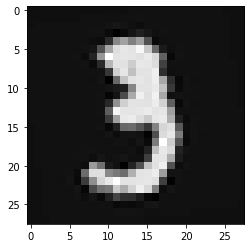

In [254]:
# Example 1.
show_data(X_train, Y_train,10,+10)

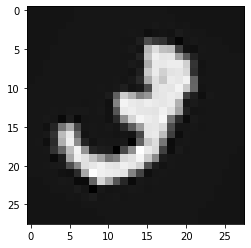

In [255]:
# Example 2.
show_data(X_train, Y_train,10,-30)

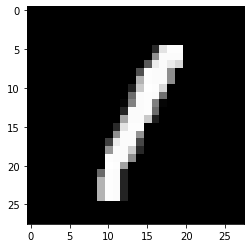

In [256]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [257]:
# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

In [258]:
SEED = 1234
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=SEED)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
print("Accuracy = {:.2f}".format(metrics.accuracy_score(Y_test, y_pred)))

Accuracy = 0.68


In [259]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

model = SVC()
cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')

array([0.9 , 0.75, 0.75, 0.8 , 0.8 ])

In [261]:
param_grid = {'kernel': ['rbf', 'poly'], 'C': [0.1,1,10],'gamma': [1, 0.2, 0.03]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.2, 0.03],
                         'kernel': ['rbf', 'poly']})

In [262]:
print(grid.best_score_)
print(grid.best_params_)

# No, the accuracy is not high enough

0.8099999999999999
{'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [263]:
def rotate_data(img, angle=0):
    size = int(np.sqrt(img.shape[0]))
    rot_img = rotate(img.reshape(size,size), angle, reshape = False) 
    return rot_img.reshape(img.shape[0])

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [264]:
aug_X_train = []
aug_Y_train = []
# do a rotation
for i in range(len(X_train)):
    aug_X_train.append(rotate_data(X_train[i], angle=50))
    aug_X_train.append(rotate_data(X_train[i], angle=-50))
    aug_Y_train.append(rotate_data(X_train[i], angle=50))
    aug_Y_train.append(rotate_data(X_train[i], angle=-50))
# Concatenate data after rotation
aug_X_train = np.concatenate((X_train, X_train2))
aug_Y_train = np.concatenate((Y_train, Y_train2))

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [265]:
# <Your code goes in here>
#Algorithm : Support vector machine (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=SEED)
svc.fit(aug_X_train, aug_Y_train)
y_pred = svc.predict(X_test)
print("Accuracy = {:.2f}".format(metrics.accuracy_score(Y_test, y_pred)))

Accuracy = 0.75


In [266]:
model = SVC()
cross_val_score(model, aug_X_train, aug_Y_train, cv=5, scoring='accuracy')

array([1.  , 1.  , 1.  , 0.66, 0.6 ])

In [267]:
param_grid = {'kernel': ['rbf', 'poly'], 'C': [0.1,1,10],'gamma': [1, 0.2, 0.03]}
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(aug_X_train, aug_Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.2, 0.03],
                         'kernel': ['rbf', 'poly']})

In [268]:
print(grid.best_score_)
print(grid.best_params_)

0.8380000000000001
{'C': 1, 'gamma': 0.03, 'kernel': 'rbf'}


In [ ]:
#yes the accuracy has gone up